In [4]:


import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline



In [5]:
df = pd.read_csv('/Users/srikrishna/DataScience/stock_price_prediction_LR/TSLA.csv')


In [6]:


df.head()



,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035004,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [9]:
cdf = df[['High', 'Low', 'Open', 'Volume','Close']]
cdf.head(9)

,High,Low,Open,Volume,Close
0,25.000000,17.540001,19.000000,18766300,23.889999
1,30.420000,23.299999,25.790001,17187100,23.830000
2,25.920000,20.270000,25.000000,8218800,21.959999
3,23.100000,18.709999,23.000000,5139800,19.200001
4,20.000000,15.830000,20.000000,6866900,16.110001
5,16.629999,14.980000,16.400000,6921700,15.800000
6,17.520000,15.570000,16.139999,7711400,17.459999
7,17.900000,16.549999,17.580000,4050600,17.400000
8,18.070000,17.000000,17.950001,2202500,17.049999


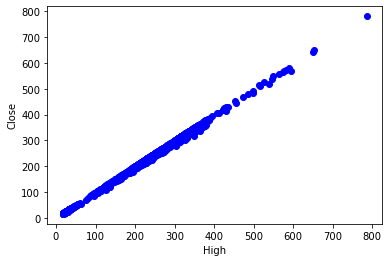

In [10]:
plt.scatter(cdf.High, cdf.Close,  color='blue')
plt.xlabel("High")
plt.ylabel("Close")
plt.show()

In [11]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

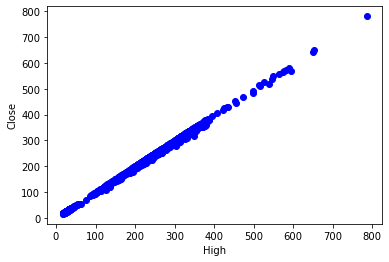

In [12]:
plt.scatter(train.High, train.Close,  color='blue')
plt.xlabel("High")
plt.ylabel("Close")
plt.show()

In [13]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['High', 'Low', 'Open', 'Volume']])
y = np.asanyarray(train[['Close']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[ 9.03222802e-01  7.49577293e-01 -6.54133530e-01 -1.16417138e-08]]


In [14]:
y_hat= regr.predict(test[['High', 'Low', 'Open', 'Volume']])
x = np.asanyarray(test[['High', 'Low', 'Open', 'Volume']])
y = np.asanyarray(test[['Close']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 3.81
Variance score: 1.00


/Users/srikrishna/opt/anaconda3/envs/datascience/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [15]:
print(y_hat)

[[ 27.83140289]
 [ 16.72805827]
 [ 16.98677498]
 [ 18.05775275]
 [ 21.73048977]
 [ 21.35128733]
 [ 20.76371121]
 [ 20.21771911]
 [ 21.64121815]
 [ 18.94713908]
 [ 19.37989445]
 [ 20.80989381]
 [ 20.29490716]
 [ 20.06157779]
 [ 20.38521233]
 [ 20.39215844]
 [ 20.54897682]
 [ 20.50632386]
 [ 21.64277742]
 [ 29.41635049]
 [ 33.11609126]
 [ 35.09444278]
 [ 30.95756322]
 [ 25.90447501]
 [ 27.34896595]
 [ 26.28540356]
 [ 24.30727403]
 [ 23.61963118]
 [ 22.73582684]
 [ 23.57372172]
 [ 23.94697677]
 [ 25.08560233]
 [ 24.38671996]
 [ 23.43291304]
 [ 22.16234457]
 [ 23.78533749]
 [ 25.67847819]
 [ 25.30873445]
 [ 26.55466102]
 [ 27.70452176]
 [ 25.75882839]
 [ 26.83810856]
 [ 27.5347654 ]
 [ 29.08609986]
 [ 27.66916377]
 [ 28.51380852]
 [ 26.83140011]
 [ 26.19475408]
 [ 23.11793973]
 [ 23.72088948]
 [ 24.79341115]
 [ 26.21965142]
 [ 26.58013625]
 [ 26.31865688]
 [ 26.48975746]
 [ 25.06917089]
 [ 28.61363016]
 [ 31.20151205]
 [ 30.9108786 ]
 [ 31.13887714]
 [ 31.30322711]
 [ 32.06764792]
 [ 32.92

In [17]:
df2 = pd.DataFrame({'Actual': y.flatten(), 'Predicted' : y_hat.flatten()})

In [18]:
df2.head(25)

,Actual,Predicted
0,23.830000,27.831403
1,16.110001,16.728058
2,17.400000,16.986775
3,18.139999,18.057753
4,21.910000,21.730490
5,21.290001,21.351287
6,20.719999,20.763711
7,20.350000,20.217719
8,21.950001,21.641218
9,19.030001,18.947139


In [19]:
graph = df2.head(20)

<AxesSubplot:>

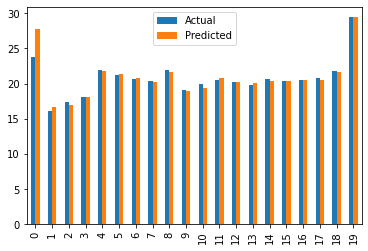

In [20]:
graph.plot(kind='bar')